# setup

In [ ]:
import pickle, pandas, os, numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

# set relative paths to data and images

In [ ]:
from google.colab import drive ; drive.mount('/content/gdrive')
# change to whereve you have the images/ and benchmark.csv data
base_dir = './gdrive/MyDrive/neurips_benchmark/for_reviewers'
# path to wherever you have benchmark.csv
data_dir = os.path.join(base_dir, 'data')
# path to wherever you have images/
image_dir= os.path.join(base_dir, 'images')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def extract_list(l):
  return [i[1:-1] for i in l[1:-1].split(', ')]

# load behavioral data averaged across trials
df = pandas.read_csv(os.path.join(data_dir, 'benchmark.csv'))

# reformat list of images for each trial
df['images'] = [extract_list(df.images[i]) for i in range(len(df))]

# list all models we have results for

In [ ]:
# models we have results for
[i for i in df.columns.unique() if 'avg' in i]

['dinov2-giant_svm_avg',
 'dinov2-base_svm_avg',
 'dinov2-large_svm_avg',
 'CLIP_ViT-B-32_svm_avg',
 'CLIP_ViT-B-16_svm_avg',
 'CLIP_ViT-L-14_svm_avg',
 'CLIP_ViT-H-14_svm_avg',
 'CLIP_ViT-g-14_svm_avg',
 'vit-mae-base_svm_avg',
 'vit-mae-large_svm_avg',
 'vit-mae-huge_svm_avg',
 'dino_distance_avg']

# quick visualization of results for a single model

In [ ]:
# pick a model to visualize results for
imodel = [i for i in df.columns.unique() if 'avg' in i][0]

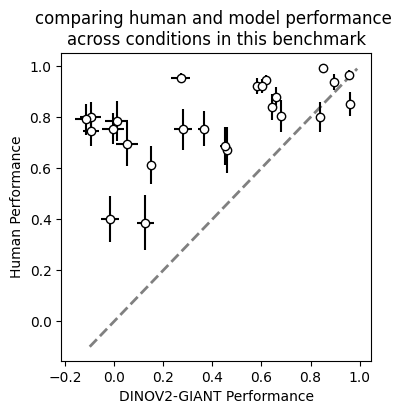

In [ ]:
plt.figure(figsize=[4, 4])
plt.scatter(x=df.groupby('condition')[imodel].mean(),
            y=df.groupby('condition')['human_accuracy'].mean(), edgecolor='black', facecolor='white')
plt.errorbar(x=df.groupby('condition')[imodel].mean(),
             y=df.groupby('condition')['human_accuracy'].mean(),
             xerr=df.groupby('condition')[imodel.split('avg')[0] + 'sem'].mean(),
             yerr=df.groupby('condition')['human_accuracy_sem'].mean(),
             ls='', color='black', zorder=-2)
plt.plot([-.1, .99], [-.1, .99],
           linestyle='--', color='grey', zorder=-10, linewidth=2)
plt.xlabel('%s Performance'%imodel.split('_svm')[0].upper() )
plt.ylabel('Human Performance')
plt.title('comparing human and model performance \nacross conditions in this benchmark');

# quick example of how to get images and the answer for each trial

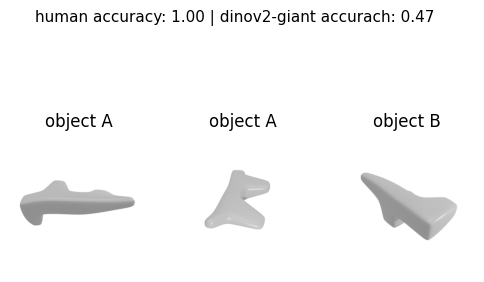

In [ ]:
n_random_trials = 1

for random_trial in range(n_random_trials):

  # choose a random trial
  i_df = df.sample(1)
  # extract trial images
  i_images = i_df.images.values[0]
  # extract trial 'oddity' (i.e., the index of the non-matching object)
  i_oddity = i_df.oddity_index.values[0]

  plt.figure(figsize=[6, 4])

  for idx, i_image in enumerate(i_images):

    plt.subplot(1, len(i_images), idx+1)
    plt.imshow(Image.open(os.path.join(image_dir, i_image)))
    plt.axis('off')
    plt.title(['object A', 'object B'][idx==i_oddity])
  plt.suptitle('human accuracy: %.02f | %s accuracy: %.02f'%(
      i_df.human_accuracy.values[0],
      imodel.split('_svm')[0],
      i_df[imodel].values[0]), fontsize=11)
  plt.show()